In [1]:
import numpy as np
from sympy import *
#resuelva el siguiente sistema no homogéneos por el método de variación de parámetros.
t = symbols('t')
s = symbols('s')
x= symbols('x', cls=Function)
y = symbols('y', cls=Function)
X, Y = symbols('X Y', cls = Function)
c1, c2 = symbols('c1 c2')

In [2]:
coeficientes = Matrix([[1, 6], [-1, 6]])
resultador = Matrix([exp(t), 0])
condicionesIniciales = {x(0):1,y(0):1}

In [3]:
eqx = Eq(x(t).diff(t),x(t)+6*y(t)+exp(t))
eqy= Eq(y(t).diff(t),-x(t)+6*y(t)+0)
display(eqx,eqy)

Eq(Derivative(x(t), t), x(t) + 6*y(t) + exp(t))

Eq(Derivative(y(t), t), -x(t) + 6*y(t))

In [4]:
laplaceX = Eq(laplace_transform(eqx.lhs,t,s,noconds=True),laplace_transform(eqx.rhs,t,s,noconds=True))
laplaceY = Eq(laplace_transform(eqy.lhs,t,s,noconds=True),laplace_transform(eqy.rhs,t,s,noconds=True))
laplaceY = laplaceY.subs(condicionesIniciales)
laplaceX = laplaceX.subs(condicionesIniciales)


In [5]:
laplaceX = laplaceX.subs({laplace_transform(x(t),t,s,noconds=True): X(s),laplace_transform(y(t),t,s,noconds=True): Y(s)})
laplaceY = laplaceY.subs({laplace_transform(x(t),t,s,noconds=True): X(s),laplace_transform(y(t),t,s,noconds=True): Y(s)})

In [6]:
sistema = (laplaceX,laplaceY)
display(sistema[0],sistema[1])

Eq(s*X(s) - 1, X(s) + 6*Y(s) + 1/(s - 1))

Eq(s*Y(s) - 1, -X(s) + 6*Y(s))

In [7]:
solucion = solve(sistema, [X(s), Y(s)])


In [8]:
display(solucion[X(s)],solucion[Y(s)])  

(s**2 - 6)/(s**3 - 8*s**2 + 19*s - 12)

(s**2 - 3*s + 1)/(s**3 - 8*s**2 + 19*s - 12)

In [9]:
#para facilitar el calculo de la inversa de laplace, utililizaremos las fracciones parciales
solucion[X(s)] = apart(solucion[X(s)],s)
solucion[Y(s)] = apart(solucion[Y(s)],s)
display(solucion[X(s)],solucion[Y(s)])

-5/(6*(s - 1)) - 3/(2*(s - 3)) + 10/(3*(s - 4))

-1/(6*(s - 1)) - 1/(2*(s - 3)) + 5/(3*(s - 4))

In [10]:
#calculamos la inversa de laplace
solucion[X(s)] = inverse_laplace_transform(solucion[X(s)],s,t,conds=None)
solucion[Y(s)] = inverse_laplace_transform(solucion[Y(s)],s,t,conds=None)
display(solucion[X(s)],solucion[Y(s)])

10*exp(4*t)*Heaviside(t)/3 - 3*exp(3*t)*Heaviside(t)/2 - 5*exp(t)*Heaviside(t)/6

5*exp(4*t)*Heaviside(t)/3 - exp(3*t)*Heaviside(t)/2 - exp(t)*Heaviside(t)/6

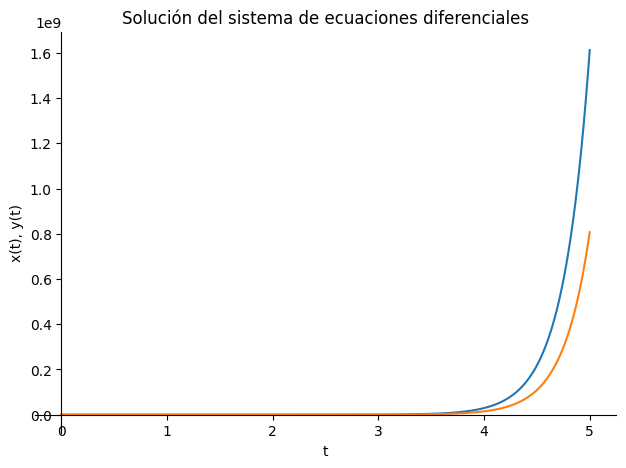

In [11]:
#graficamos la solución
plot(solucion[X(s)],solucion[Y(s)],(t,0,5), title = 'Solución del sistema de ecuaciones diferenciales', xlabel = 't', ylabel = 'x(t), y(t)')